In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#Data Sourcing
data = pd.read_csv("loan.csv", header = 0)
print(data.head())
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data.info())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [3]:
#Data Cleaning process

#Check null columns
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [4]:
#drop null columns
data = data.dropna(axis=1,how='all')

In [5]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [6]:
#check number columns 
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [7]:
#Since many columns has values 0 drop them
data = data.loc[:, (data != 0).any(axis=0)]

In [8]:
#print unique value for all columns
for i in data:
    print(i, data[i].unique())

id [1077501 1077430 1077175 ...   90395   90376   87023]
member_id [1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050

total_acc [ 9  4 10 37 38 12 11 13  3 23 34 29 28 42 14 22 21 17  7 31 44 26 16  6
 18 27 24 25 40 35  8 20 15 19 36 51 32 30 33 46  5 61 56 50 41 39 79 62
 43 47 53 45 60 55 52 58 54 57 49 63 48 59 77 87 75 72 64 67 78 76 74 66
 81 90 80 71 69 73 70 68 65  2]
initial_list_status ['f']
out_prncp [   0.    524.06 1849.1  ...   19.12   13.28   79.24]
out_prncp_inv [   0.    524.06 1844.43 ...   19.09   13.28   79.24]
total_pymnt [5863.155187 1008.71     3005.666844 ... 5272.161128 5174.198551
 9195.263334]
total_pymnt_inv [5833.84 1008.71 3005.67 ... 1397.12  672.66  980.83]
total_rec_prncp [ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]
total_rec_int [ 863.16  435.17  605.67 ... 1413.49  174.2  1695.26]
total_rec_late_fee [ 0.         16.97       15.00000003 ...  1.69        1.36
 19.89      ]
recoveries [  0.   117.08 189.06 ... 304.2   35.7   21.29]
collection_recovery_fee [0.0000e+00 1.1100e+00 2.0900e+00 ... 6.6836e+02 4.4425e+02 2.3000e-01]
last_pymnt_d ['Jan-15' 'Apr-1

In [9]:
#drop columns which has only 1 value/No significant data/ Most Null values

# pymnt_plan all values are n
# url no significant data
# desc no significant data
# initial_list_status since all values are f
# policy_code since all values are 1
# application_type since all values are INDIVIDUAL
# tax_liens since values are 0 or NaN
# chargeoff_within_12_mths since all values are 0 or NaN
# collections_12_mths_ex_med since all values are 0 or NaN
# mths_since_last_delinq since major values are Null
# mths_since_last_record since major values are Null
# next_pymnt_d since major values are Null
data.drop(['pymnt_plan', 'url', 'desc', 'initial_list_status', 'policy_code', 'application_type', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'],axis=1,inplace=True) 


In [10]:
#Data Manipulation starts

#Checking term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
data.term = data.term.str.replace('months','') # removing months from term column
data.term = data.term.astype("int64") # set term column to int64
data.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [12]:
#Checking int_rate column

data.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [13]:
data.int_rate = data.int_rate.str.replace('%','') # removing % from int_rate column
data.int_rate = data.int_rate.astype("float64") 
data.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [14]:
#Checking revol_util column
print(data.revol_util.isnull().sum())
print(data.revol_util.unique())
print(data.revol_util.describe())

50
['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object


In [15]:
data.revol_util = data.revol_util.fillna(0) #replace blank values with 0
data.revol_util = data.revol_util.str.replace('%','') # removing % from revol_util column
data.revol_util = data.revol_util.astype("float64") 
print(data.revol_util.isnull().sum())
print(data.revol_util.unique())
print(data.revol_util.describe())

50
[8.370e+01 9.400e+00 9.850e+01 ... 4.963e+01 4.000e-02 7.280e+00]
count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


In [16]:
#Checking emp_length column
print(data.emp_length.isnull().sum())
print(data.emp_length.unique())
print(data.emp_length.describe())

1075
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object


In [17]:
data.emp_length = data.emp_length.str.replace('years','') # removing years from emp_length column
data.emp_length = data.emp_length.str.replace('year','') # removing year from emp_length column
data.emp_length = data.emp_length.str.replace('+','') # removing + from emp_length column
data.emp_length = data.emp_length.str.replace('<','') # removing < from emp_length column

In [18]:
data.emp_length = data.emp_length.fillna(0) #replace blank values with 0
data.emp_length = data.emp_length.astype("int64")
print(data.emp_length.isnull().sum())
print(data.emp_length.unique())
print(data.emp_length.describe())

0
[10  1  3  8  9  4  5  6  2  7  0]
count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [19]:
#Checking pub_rec_bankruptcies column

print(data.pub_rec_bankruptcies.isnull().sum())
print(data.pub_rec_bankruptcies.unique())
print(data.pub_rec_bankruptcies.describe())

697
[ 0.  1.  2. nan]
count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [20]:
data.pub_rec_bankruptcies = data.pub_rec_bankruptcies.fillna(0) #replace blank values with 0
print(data.pub_rec_bankruptcies.isnull().sum())
print(data.pub_rec_bankruptcies.unique())
print(data.pub_rec_bankruptcies.describe())

0
[0. 1. 2.]
count    39717.000000
mean         0.042501
std          0.202603
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [21]:
#Checking columns info after cleanup and column drop
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               39717 non-null  int64  
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [22]:
#Checking data based on data type
data.select_dtypes(include=['number']).describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,4.954226,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.042501
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,3.461960,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.202603
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [23]:
#dropping columns since min 25% 50% 75% values is 0 and do not help in any derivation
data.drop(['out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee','pub_rec'],axis=1,inplace=True)
data.shape

(39717, 37)

In [24]:
print(data.id.duplicated().sum()) #checking if any duplicate rows based on id column
print(data.member_id.duplicated().sum()) #checking if any duplicate rows based on member_id column

0
0


In [25]:
#dropping 2 columns since thier data is not significant and all are unique values
data.drop(['id','member_id'],axis=1,inplace=True)
data.shape

(39717, 35)

In [26]:
#Checking emp_title and title columns for null values and any significant data
print(data.emp_title.unique())
print(data.title.unique())

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']


In [27]:
#drop columns since no significant data 
data.drop(['emp_title','title'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [28]:
#Since all columns are having non null values except last_paymnt_d which has 71 null values. We will check this later.

Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64


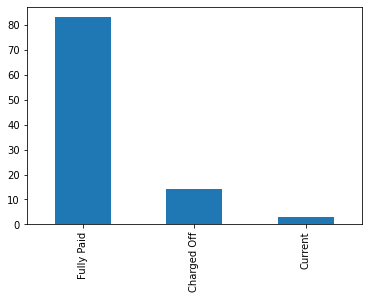

In [29]:
##Univariate Variables Starts

# target column is loan_status we will start analysis
print(round(data.loan_status.value_counts()*100/len(data),2))
round(data.loan_status.value_counts()*100/len(data),2).plot.bar()
plt.show()
#Observation :
# 82.96% loan is Fully Paid
# 14.17% loan is Charges Off(Defaulted)
# 2.87% loan is Current(In Progress loan)

In [30]:
#Since we are analysing on Fully Paid and Charged Off data we will drop data which are loan_status = Current 
data = data[data['loan_status'].isin(['Fully Paid','Charged Off'])]

In [31]:
# Add new columns for issue_d for year and month
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_year']=data['issue_d'].dt.year
data['issue_month']=data['issue_d'].dt.month

In [32]:
#Subset data for loan_status = Charged Off
data_c = data[data['loan_status'].isin(['Charged Off'])]

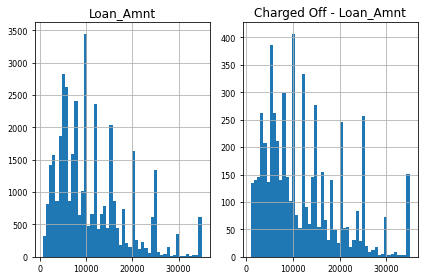

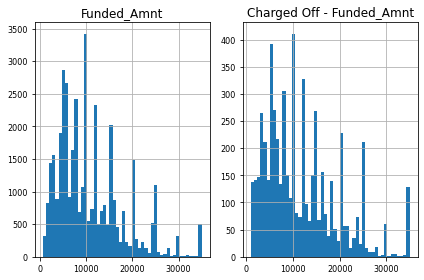

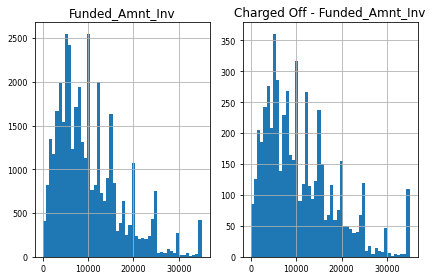

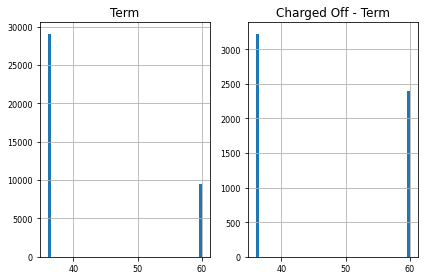

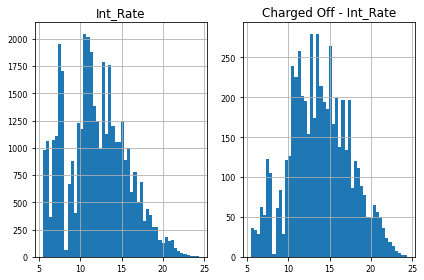

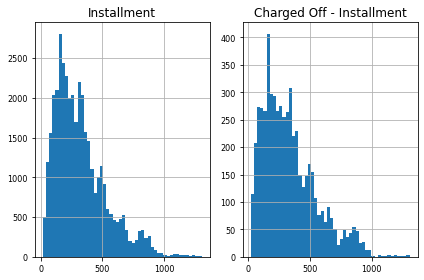

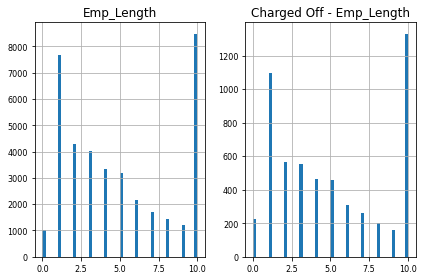

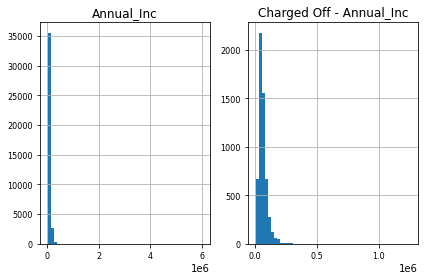

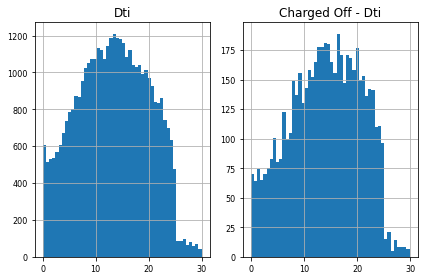

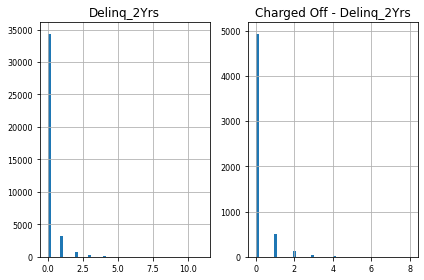

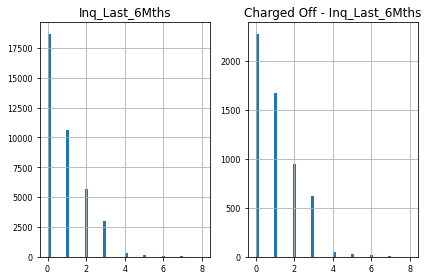

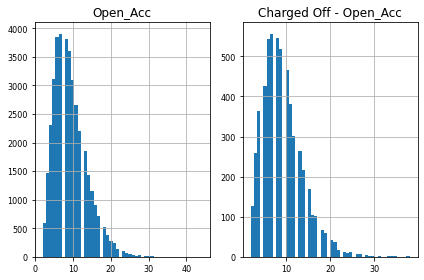

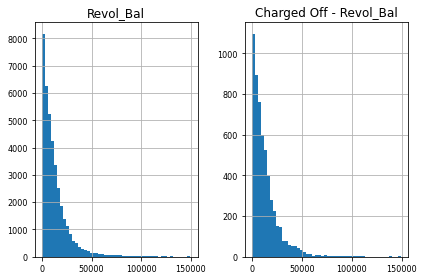

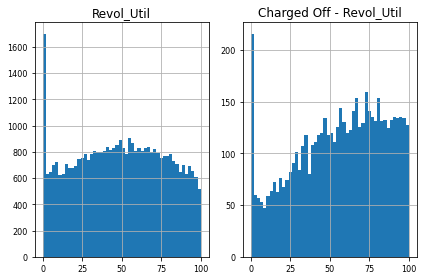

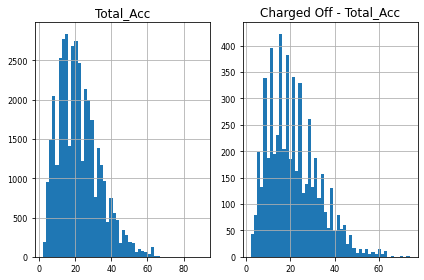

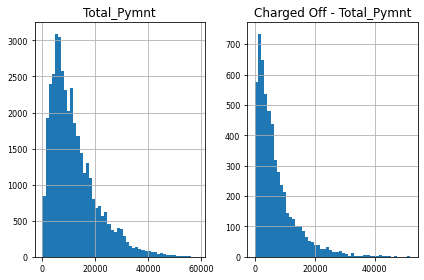

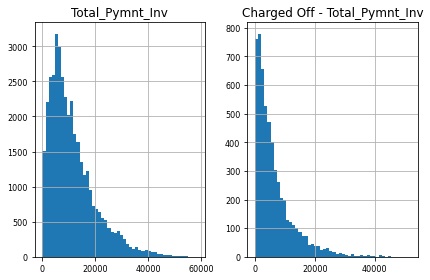

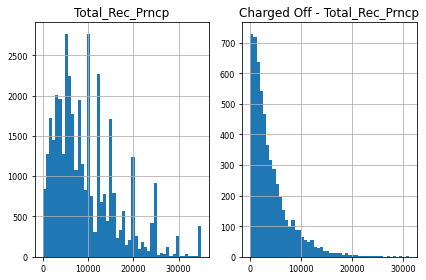

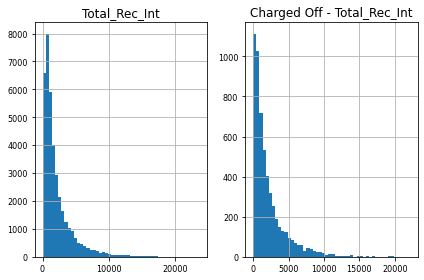

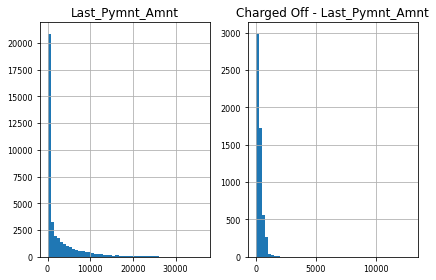

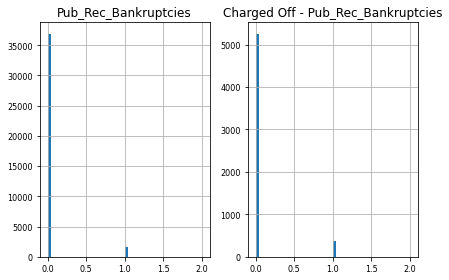

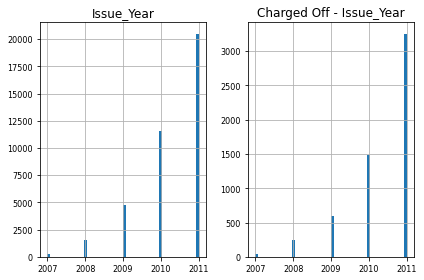

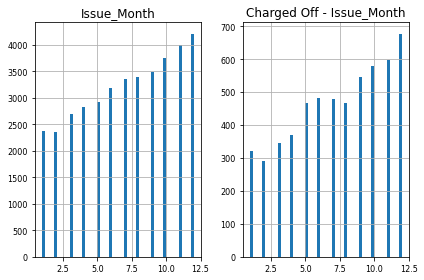

In [33]:
#Checking hist diagran of all number columns
nrow = indx = 1

def plotHistChart(i):
    plt.subplot(1,2,1)
    ax = data[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.subplot(1,2,2)
    ax1 = data_c[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax1.set_title('Charged Off - ' + i.title())
    plt.tight_layout()
    plt.show()
    
for i in data.select_dtypes(include=['number']):
    plotHistChart(i)

#Observation:
#Loan_Amnt: 
#Funded_Amnt: Loan_Amnt and Funded_Amnt data looks similar. We can ignore this column
#Term: Borrowers are more for 36 months.Loans are defaulted for 60 months term more then 36 months
#Int_Rate: int_rate column shows range is between 5 to 25 % . Borrowers are defaulted when int_rate is higher
#Emp_Length:loans are taken by ~1 year experience and 10 year experience people more and also getting defaulted more
#Annual_Inc: Annual income is less for borrowers whose is getting defaulted
#annual_inc column shows data with many outliers.Need to analyse further.
#Dti: If Dti is high the loans are getting defaulted more.
#Delinq_2yrs: No significant observation
#Open_acc: No significant observation
#Revol_util: No significant observation
#Total_paymnt: No significant observation
#Pub_rec_bankrupcies: few loans are approved for pub_rec_bankruptcies = 1
#Issue_year: Number of loan application has increased every year
#Issue_month: Number of loan application are more at the end of the year (Dec month)


In [34]:
# Based on graph above we can drop below columns since the data is not helping in deriving if customer will default or not: 
# funded_amnt_inv,installment,inq_last_6mths,revol_bal,total_acc,total_rec_prncp,total_rec_int,last_paymnt_amnt
# earliest_cr_line,last_pymnt_d,last_credit_pull_d,zip_code,total_pymnt_inv,issue_d no significant data

data.drop(['funded_amnt_inv', 'installment','inq_last_6mths','revol_bal','total_acc','total_rec_prncp','total_rec_int','last_pymnt_amnt','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d','zip_code','total_pymnt_inv', 'issue_d'],axis=1,inplace=True)
data_c.drop(['funded_amnt_inv', 'installment','inq_last_6mths','revol_bal','total_acc','total_rec_prncp','total_rec_int','last_pymnt_amnt','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d','zip_code','total_pymnt_inv', 'issue_d'],axis=1,inplace=True)

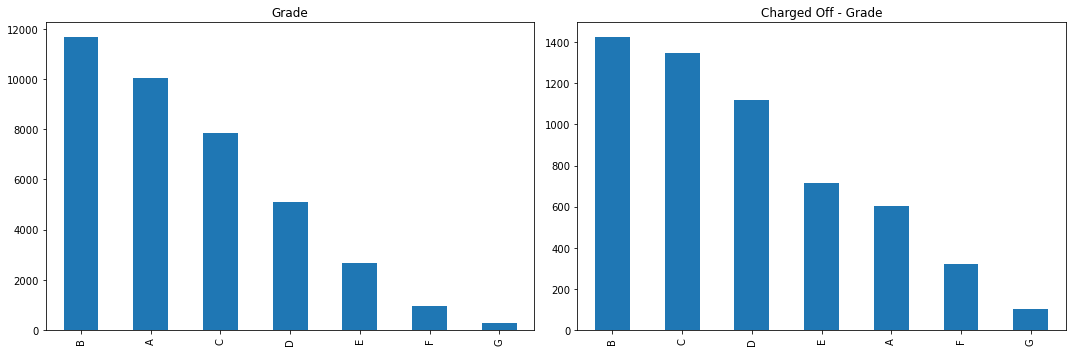

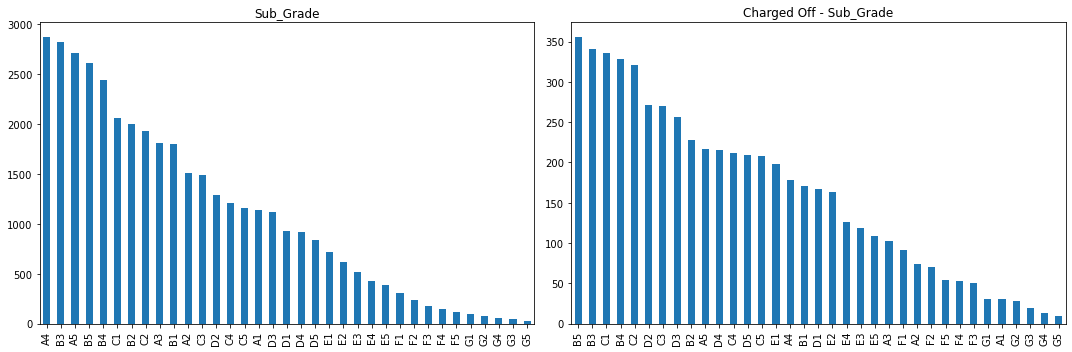

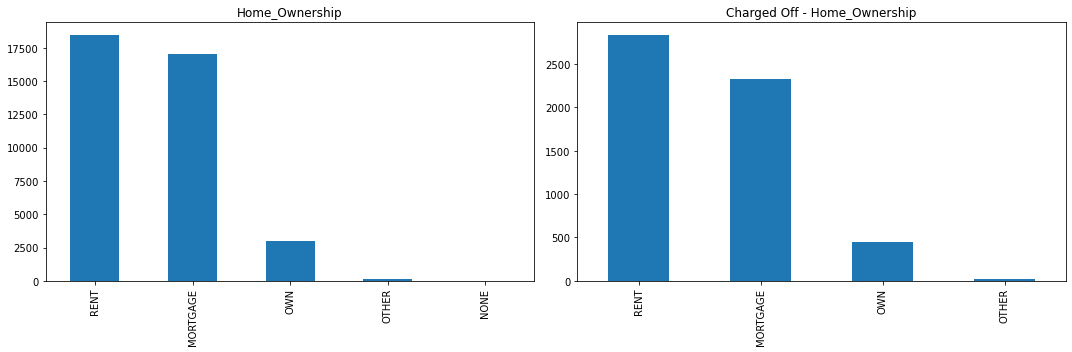

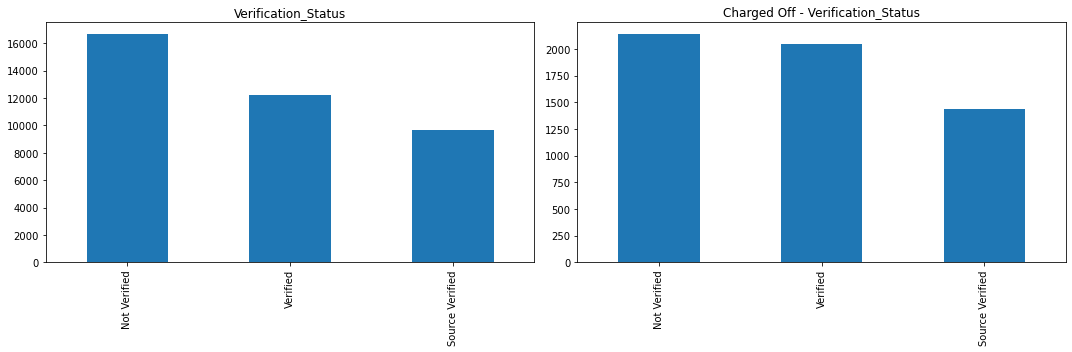

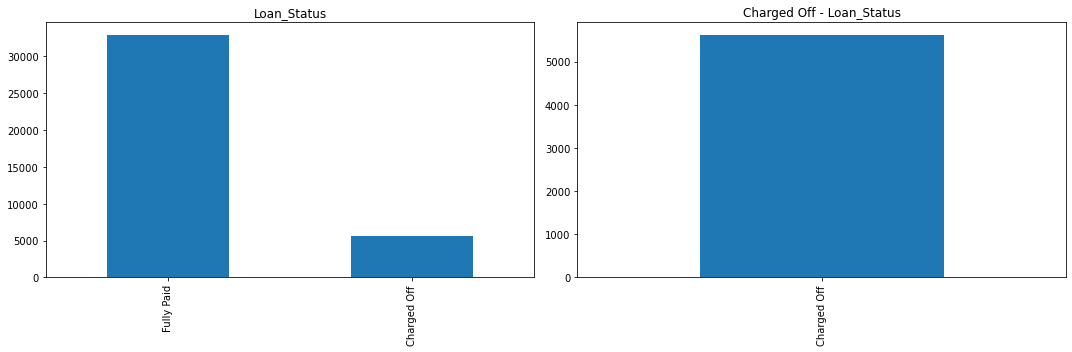

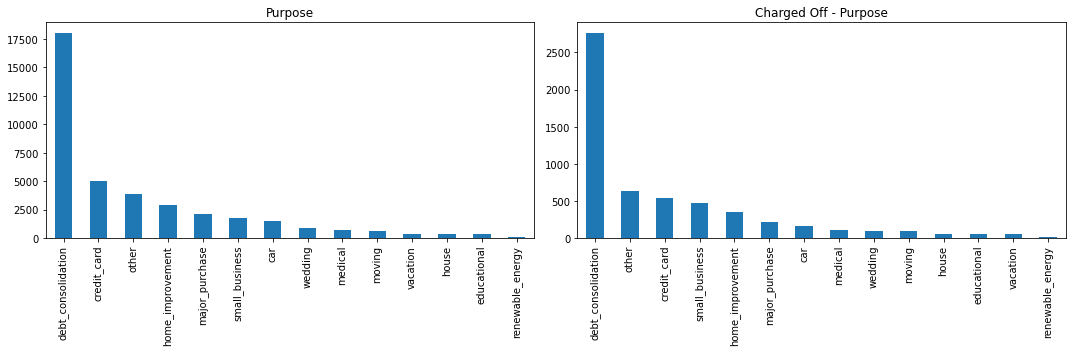

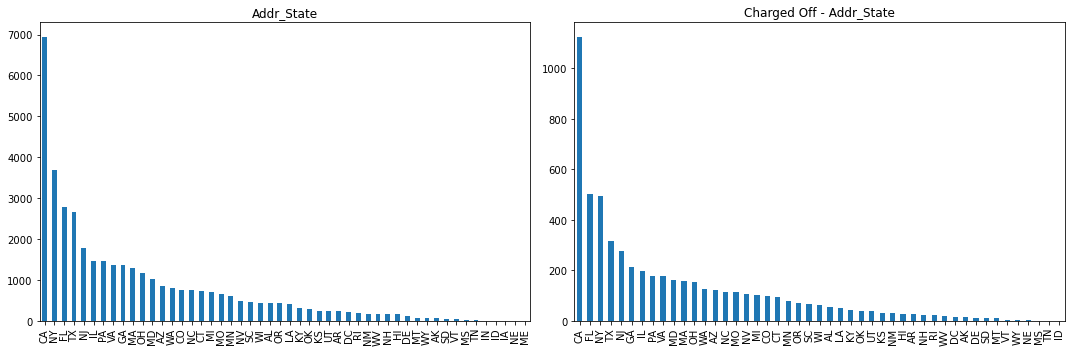

In [35]:
#Checking all Object columns bar graphs
nrow = indx = 1

def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    ax = data[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.subplot(1,2,2)
    ax1 = data_c[i].value_counts().plot.bar()
    ax1.set_title('Charged Off - ' + i.title())
    plt.tight_layout()
    plt.show()

for i in data.select_dtypes(include=['object']):
    plotBarChart(i)

#Observation:
# Grade : Loans are approved for Grade A,B,C are more.
# Sub_Grade : We see the same trend for Sub Grade wher A,B,C are approved more
# Loan_Status : Major approved loans are fully paid
# Addr_state : CA,NY/FL state has more loan applications
# Verification_status : Major loans are nor verified
# Home_ownership : Major borrowers has RENT and Mortgage ownership
# Purpose : debt_consolidation 46.80%, credit_card 13.03% and other 10.02% are major category for taking loan

In [36]:
#Checking outliers in data 

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64


<AxesSubplot:>

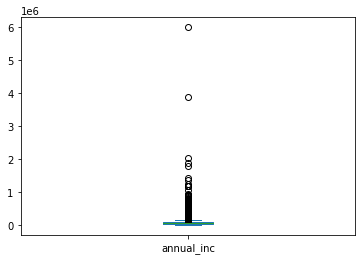

In [37]:
# Analyse column annual_inc since it shows many outliers
pd.options.display.float_format = '{:.2f}'.format 
print(data.annual_inc.describe())
data.annual_inc.plot.box()

In [38]:
print(data.annual_inc.quantile(0.90))
print(data.annual_inc.quantile(0.95))
print(data.annual_inc.quantile(0.98))
print(data.annual_inc.quantile(0.99))
print(data.annual_inc.quantile(1.0))

115000.0
140004.0
187000.0
234143.99999999878
6000000.0


In [39]:
#Based on quantile values its safe to drop outlier data
data = data[data.annual_inc < data.annual_inc.quantile(0.99)]
data.annual_inc.describe()

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64

In [40]:
data_c = data_c[data_c.annual_inc < data_c.annual_inc.quantile(0.99)]

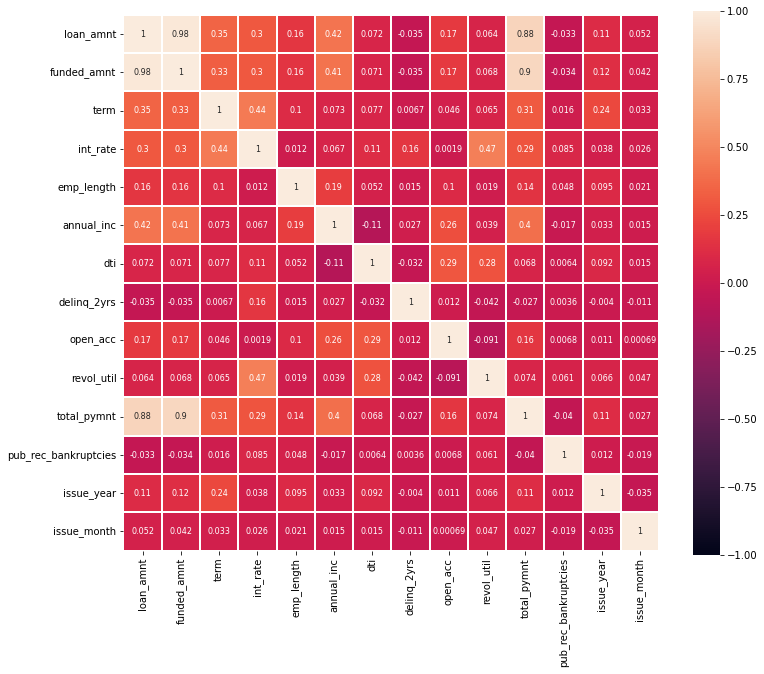

In [41]:
#Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [42]:
#Observation :
# dti is negatively impacting annual income i.e if annual income is low,dti (debt to income ratio) is high and vice versa
# loan amnt,funded_amnt,total_pymnt are correlated

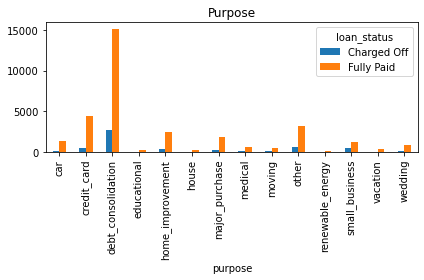

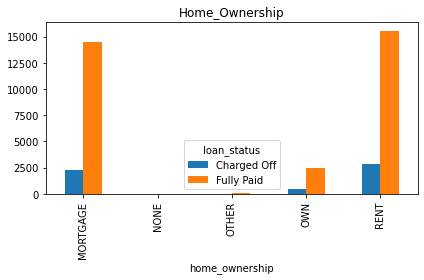

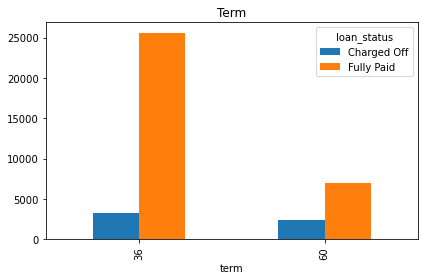

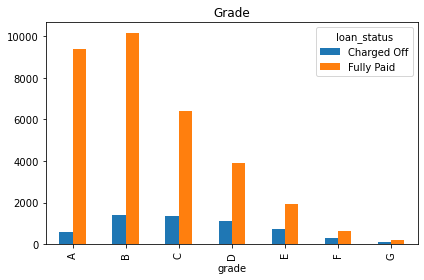

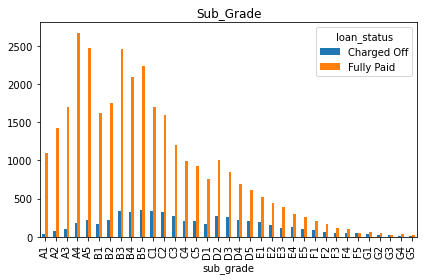

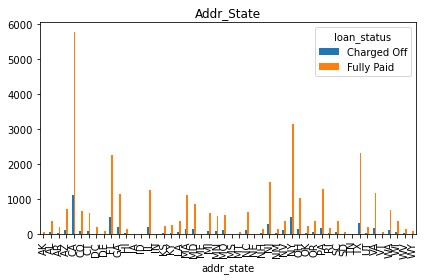

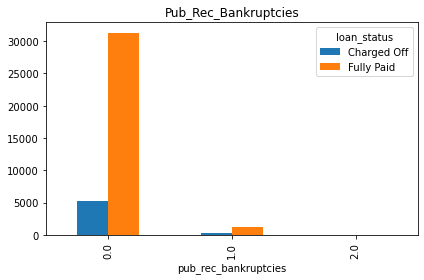

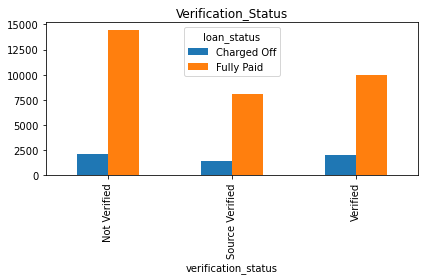

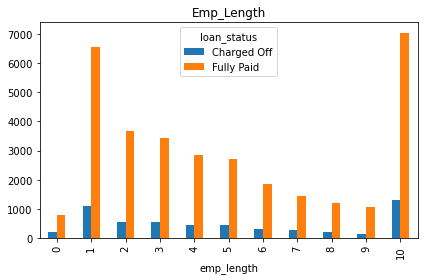

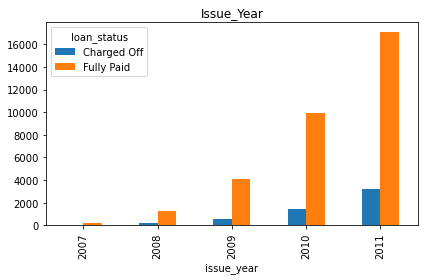

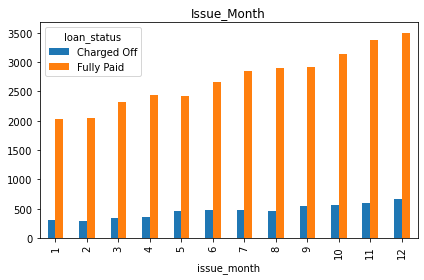

In [43]:
#target column loan_status
def plotBarChart(idx):
        ax = data.groupby([idx,'loan_status']).loan_status.count()
        #print(ax)
        ax.unstack(fill_value=0).plot.bar()
        plt.title(idx.title())
        plt.tight_layout()
        plt.show()
    
for idx in ['purpose', 'home_ownership', 'term', 'grade', 'sub_grade', 'addr_state', 'pub_rec_bankruptcies', 'verification_status','emp_length', 'issue_year', 'issue_month']:
    plotBarChart(idx)

#Observation :
#Charged off is High for debt_consolidation and credit_card purpose
#Charged off is high for RENT ad MORTGAGE Home ownership 
#Charged off is High for 36 months term.
#Charged off is High for Grade B,C,D.
#Charged off is High for CA,NY,FL state
#Published Bankruptcy no significant impact
#Verification status graph shows high loan amount application is verified

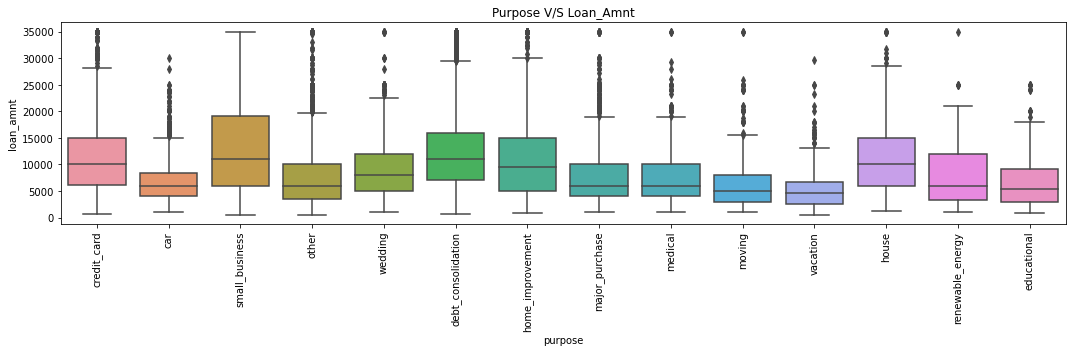

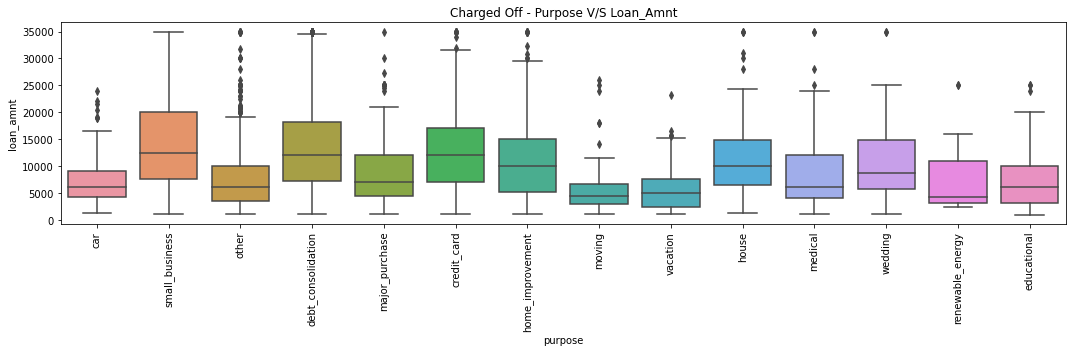

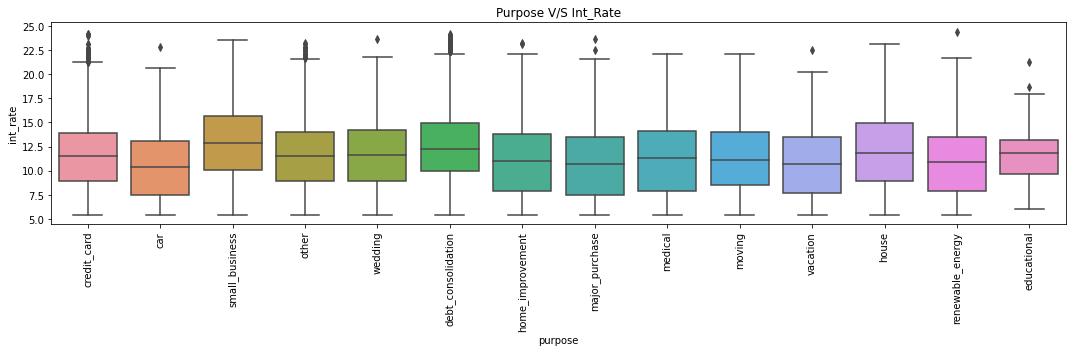

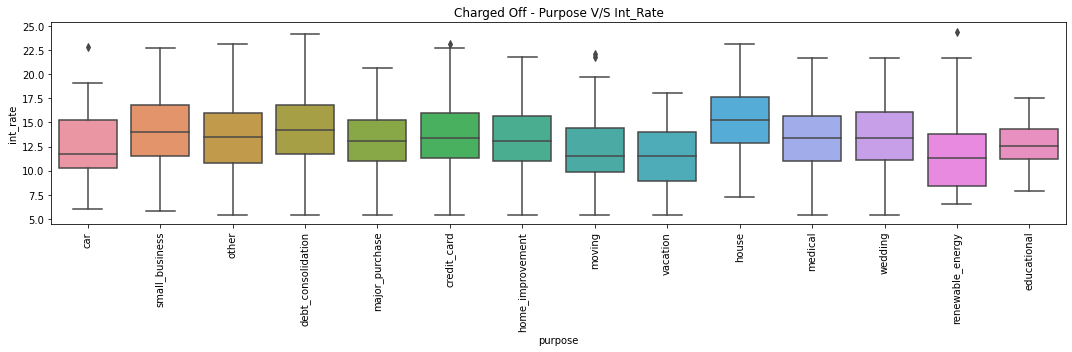

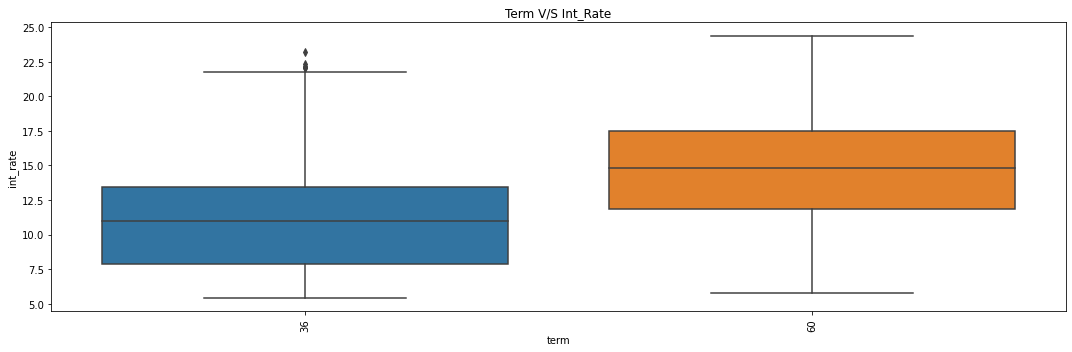

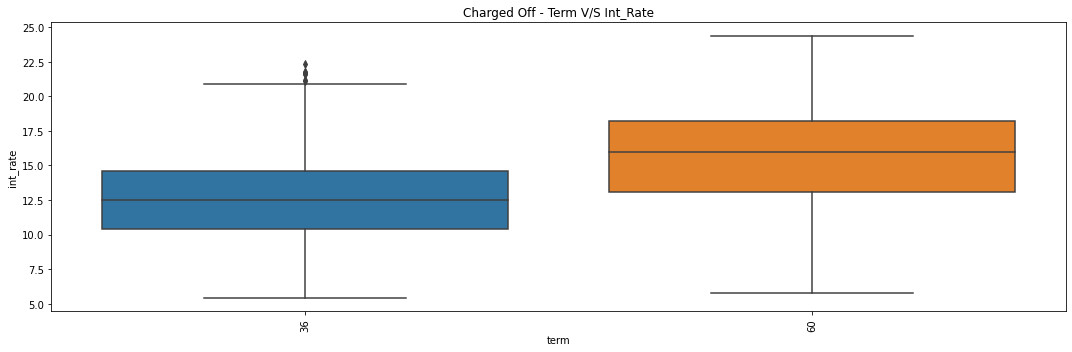

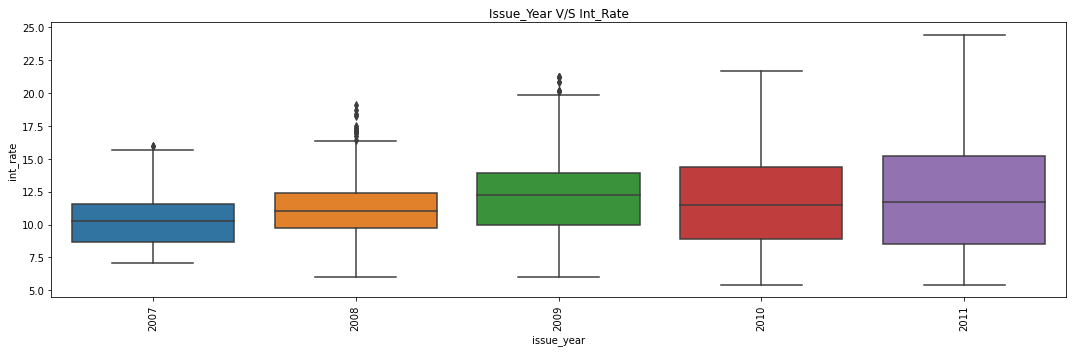

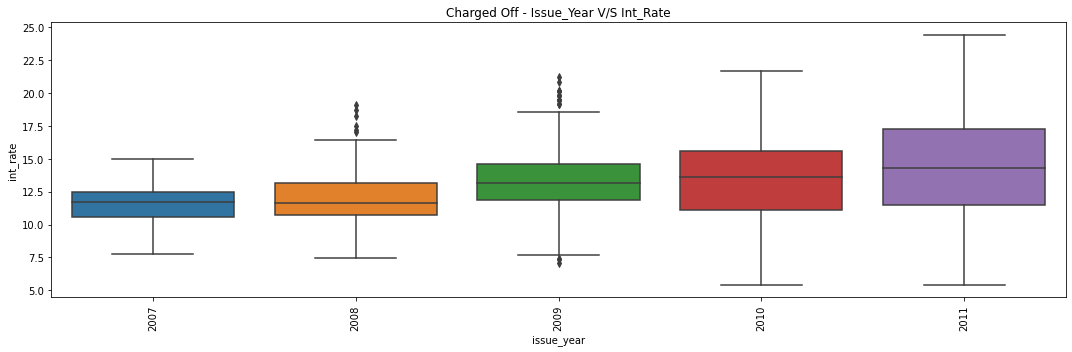

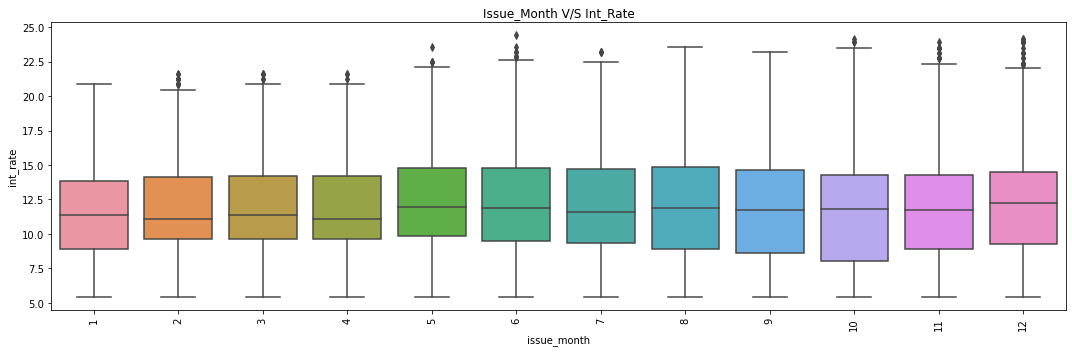

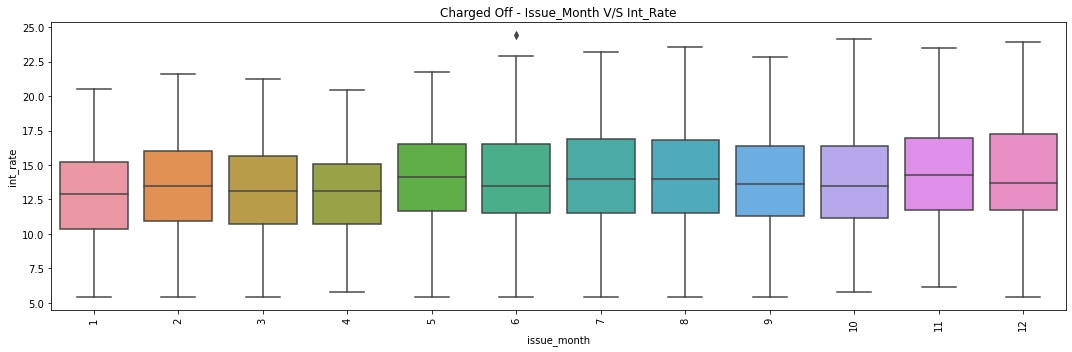

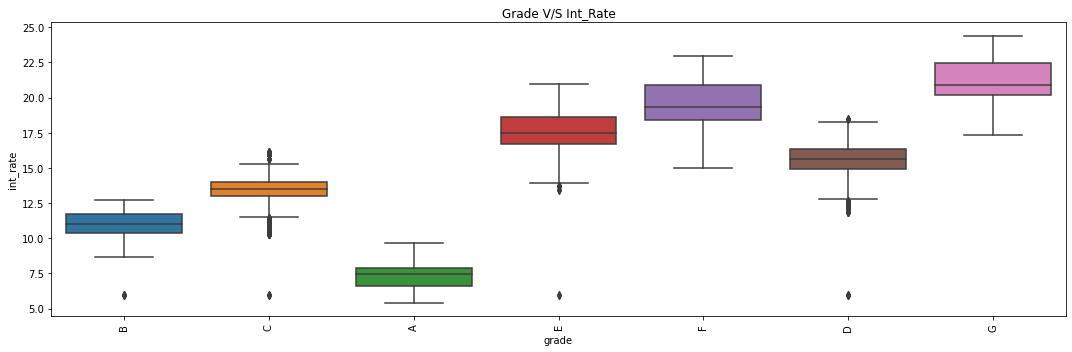

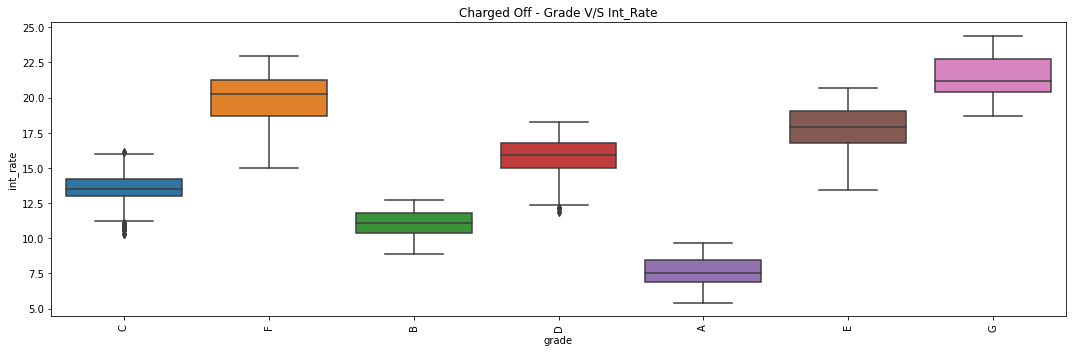

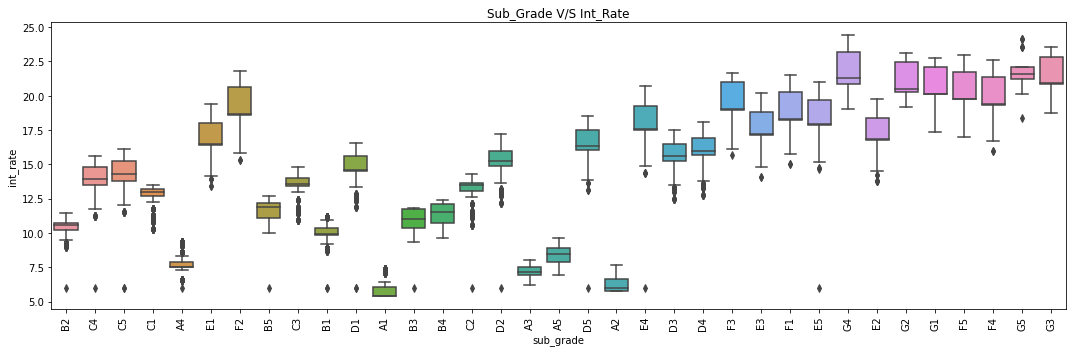

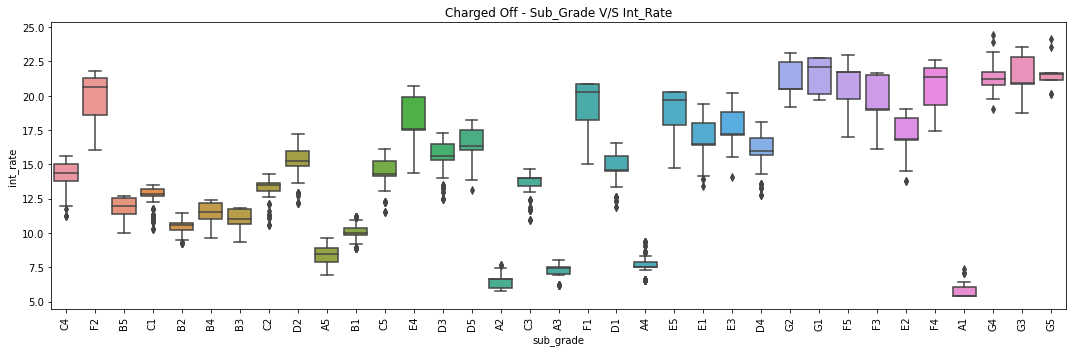

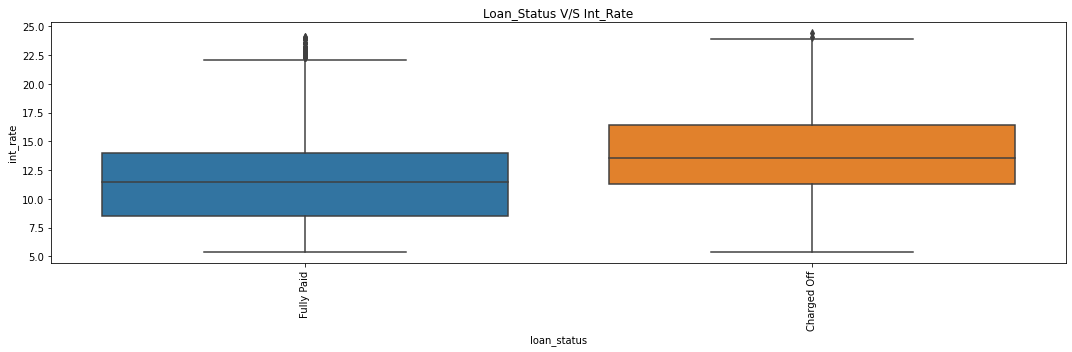

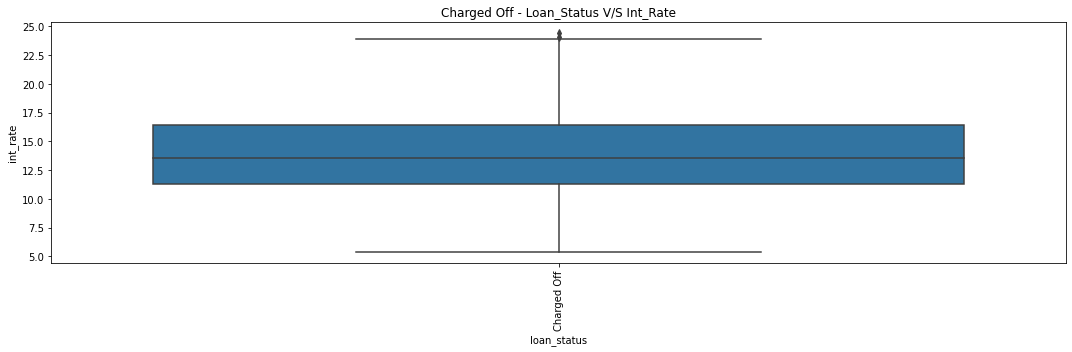

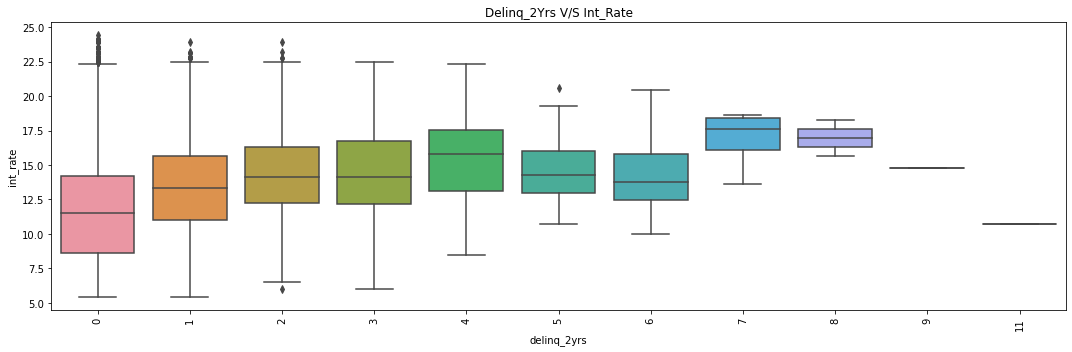

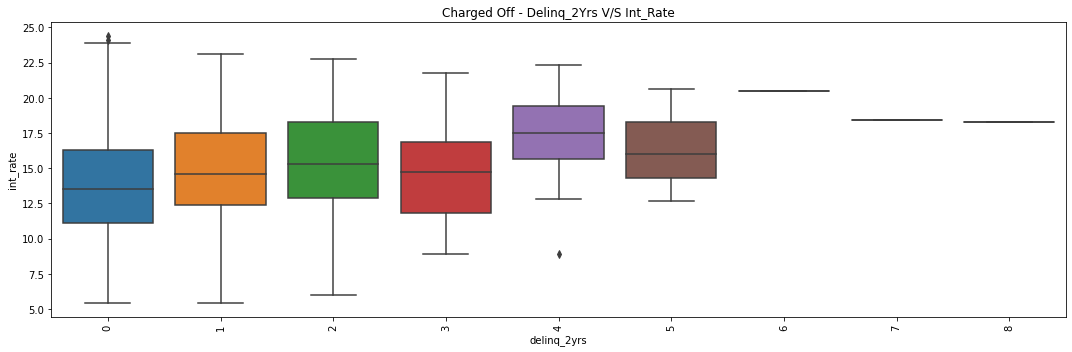

In [44]:
#Bivariate Analysis

def plotBoxChart(xAxis,yAxis):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(y=yAxis, x=xAxis, data =data)
    ax.set_title(xAxis.title() + ' V/S ' + yAxis.title())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 5))
    ax1 = sns.boxplot(y=yAxis, x=xAxis, data =data_c)
    ax1.set_title('Charged Off - ' + xAxis.title() + ' V/S ' + yAxis.title())
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()
    
#Checking Purpose with other variables
plotBoxChart('purpose','loan_amnt') 
#Observation : loan amount taken is high for small business based on mean,25%,50% and 75% values

plotBoxChart('purpose','int_rate') 
#Observation : Int rate is high for small business based on mean,25%,50% and 75% values

plotBoxChart('term','int_rate') 
#Observation : Int rate is high for 60 months term based on mean,25%,50% and 75% values

plotBoxChart('issue_year','int_rate') 
#Observation : Int rate increased every year based on mean,25%,50% and 75% values

plotBoxChart('issue_month','int_rate') 

plotBoxChart('grade','int_rate') 
#Observation : nt rate increased if Grade is Higher(i.e G) based on mean,25%,50% and 75% values

plotBoxChart('sub_grade','int_rate') 
#Observation : Larger sub grade, the int rates are higher

plotBoxChart('loan_status','int_rate') 
#Observation : loan is charged off likely if int rates are higher

plotBoxChart('delinq_2yrs','int_rate') 
#Observation : int rate increases with number of delinq

<Figure size 1080x360 with 0 Axes>

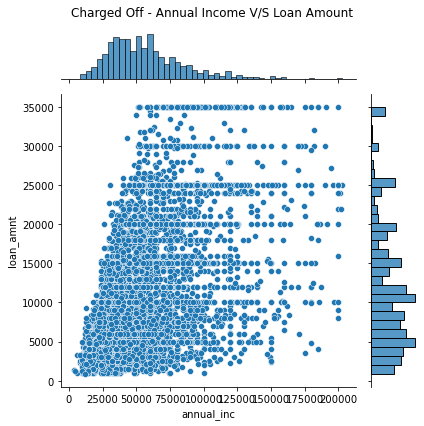

In [45]:
    plt.figure(figsize=(15, 5))
    ax1 = sns.jointplot('annual_inc', 'loan_amnt', data_c)
    ax1.fig.suptitle('Charged Off - Annual Income V/S Loan Amount')
    plt.tight_layout()
    plt.show()
    


<Figure size 1080x360 with 0 Axes>

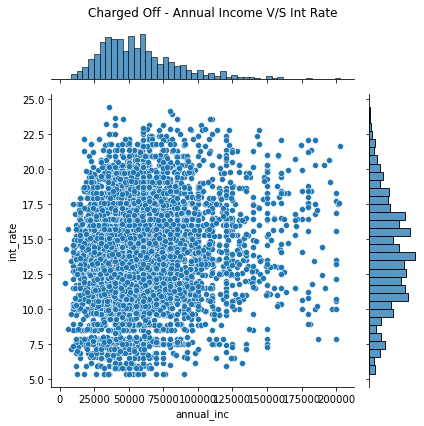

In [46]:
    plt.figure(figsize=(15, 5))
    ax1 = sns.jointplot('annual_inc', 'int_rate', data_c)
    ax1.fig.suptitle('Charged Off - Annual Income V/S Int Rate')
    plt.tight_layout()
    plt.show()

<Figure size 1080x360 with 0 Axes>

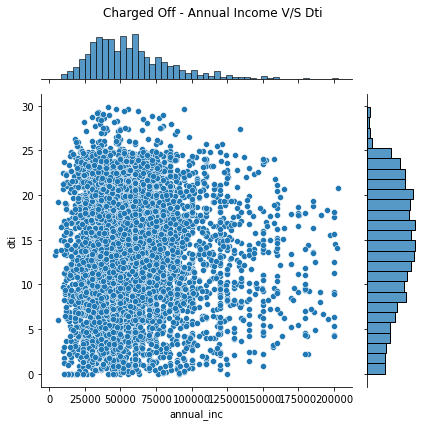

In [47]:
    plt.figure(figsize=(15, 5))
    ax1 = sns.jointplot('annual_inc', 'dti', data_c)
    ax1.fig.suptitle('Charged Off - Annual Income V/S Dti')
    plt.tight_layout()
    plt.show()

<Figure size 1080x360 with 0 Axes>

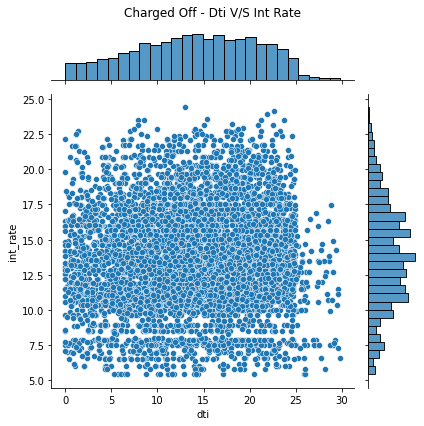

In [48]:
    plt.figure(figsize=(15, 5))
    ax1 = sns.jointplot('dti', 'int_rate', data_c)
    ax1.fig.suptitle('Charged Off - Dti V/S Int Rate')
    plt.tight_layout()
    plt.show()

In [49]:
#Observation:
#Borrowers defaulted if annual income is lower than 50000 and taking loan more than 25000 

In [50]:
#Creating categories to check which category has more defaulters
data['loan_amnt_bucket'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000-35000'])
data['annual_inc_bucket'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000'])
data['int_rate_bucket'] = pd.cut(data['int_rate'], [0, 10, 12, 16, 20, 25], labels=['0-10', '10-12', '12-16', '16-20','20-25'])

In [51]:
result1 = data.groupby(by=['annual_inc_bucket','loan_amnt_bucket','int_rate_bucket','loan_status']).loan_status.count().unstack().fillna(0)
result1['Total'] = result1['Charged Off']+result1['Fully Paid']
result1['% Charged Off'] = (result1['Charged Off']/(result1['Total'])*100)
result1 = result1[~result1['% Charged Off'].isna()].reset_index()
result1.sort_values(by=['% Charged Off'],ascending=False,inplace=True)
result1

#Observation
#Major loans defaulters are in range 
#Annual_inc 20000-40000
#Loan_amnt 21000-28000
#Int Rate 20-25

loan_status,annual_inc_bucket,loan_amnt_bucket,int_rate_bucket,Charged Off,Fully Paid,Total,% Charged Off
29,20000-40000,21000-28000,20-25,1,0,1,100.00
24,20000-40000,14000-21000,20-25,14,8,22,63.64
59,60000-80000,0-7000,20-25,4,3,7,57.14
27,20000-40000,21000-28000,13-16,8,6,14,57.14
54,40000-60000,28000-35000,20-25,4,3,7,57.14
8,0-20000,7000-14000,16-20,5,4,9,55.56
19,20000-40000,7000-14000,20-25,15,12,27,55.56
39,40000-60000,7000-14000,20-25,19,18,37,51.35
44,40000-60000,14000-21000,20-25,27,29,56,48.21
49,40000-60000,21000-28000,20-25,15,18,33,45.45


<AxesSubplot:xlabel='annual_inc_bucket', ylabel='int_rate_bucket'>

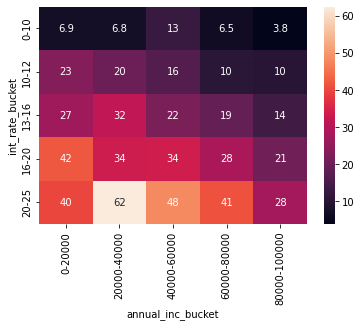

In [52]:
result3 = pd.pivot_table(data=result1,index='int_rate_bucket',columns='annual_inc_bucket',values='% Charged Off')
sns.heatmap(result3,annot=True)

<AxesSubplot:xlabel='annual_inc_bucket', ylabel='loan_amnt_bucket'>

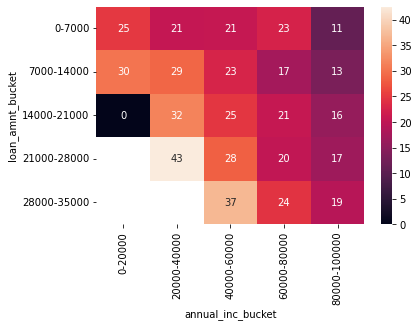

In [53]:
result3 = pd.pivot_table(data=result1,index='loan_amnt_bucket',columns='annual_inc_bucket',values='% Charged Off')
sns.heatmap(result3,annot=True)